In [11]:
from sentence_transformers.util import cos_sim

from rag.embeddings import LocalEmbedder
from rag.config import settings

embedder = LocalEmbedder(settings.embedding_model)
embedder.model_name

'all-MiniLM-L6-v2'

In [12]:
embedder.embed_text('Test sentence')

array([ 4.29728217e-02,  9.66348723e-02, -2.12918106e-03,  7.82682896e-02,
       -6.41744724e-03,  3.80002558e-02,  9.46168005e-02,  3.93962720e-04,
       -5.45614138e-02,  1.48365591e-02,  1.35712281e-01, -7.15561882e-02,
        1.98368188e-02,  4.60876711e-03,  2.93407440e-02, -2.44426411e-02,
        2.55676303e-02, -3.15778181e-02, -6.94974139e-02,  2.44781654e-03,
        4.08358350e-02, -1.56645365e-02,  6.57426333e-03,  4.47515920e-02,
        4.42353403e-03,  5.28066978e-02, -5.22431880e-02,  2.03372333e-02,
        7.58799911e-02, -2.19202712e-02, -2.24517342e-02,  2.38462575e-02,
        9.50960536e-03,  8.76056403e-02,  5.16428910e-02, -5.79361478e-03,
        6.01317780e-03,  2.46344740e-03,  1.73994247e-02, -2.02384545e-03,
       -1.28351490e-03, -1.18024200e-01,  6.54889494e-02, -1.59118150e-03,
        2.21067704e-02,  3.98668926e-03, -5.12573682e-02,  4.59730960e-02,
       -5.94871603e-02, -4.02599163e-02, -4.32095118e-02, -4.56050448e-02,
       -8.21539015e-02, -

In [13]:
print(embedder.model.max_seq_length)  # Usually 256 or 512

256


In [14]:
embedder.embed_text('Test sentence').shape, embedder.dimension

((384,), 384)

In [15]:
import numpy as np

emb = embedder.embed_text('Test sentence')
np.linalg.norm(emb)

np.float32(1.0)

In [16]:
embedder.embed_batch([
    'Test sentence 123',
    'Test sentence 234',
]).shape

(2, 384)

In [24]:
from datasets import Dataset, DatasetDict
from sentence_transformers.util import cos_sim

sentences = [
    "Myocarditis symptom",
    "Heart disease"
]

embs = embedder.embed_batch(sentences)

ds = Dataset.from_dict({
    "text": sentences,
    "emb": embs.tolist()
})
ds

Dataset({
    features: ['text', 'emb'],
    num_rows: 2
})

[0.02470497041940689,
 -0.014249959029257298,
 0.02994726225733757,
 0.08571617305278778,
 0.027141571044921875,
 -0.04962596669793129,
 0.024072395637631416,
 0.03553302586078644,
 0.01784556545317173,
 -0.0340292751789093,
 -0.022301161661744118,
 -0.04641974717378616,
 0.07517695426940918,
 0.09429674595594406,
 -0.010060606524348259,
 -0.06624175608158112,
 -0.02012551762163639,
 -0.07879673689603806,
 0.026864126324653625,
 0.02471201866865158,
 -0.0701221227645874,
 0.03728414699435234,
 -0.10861827433109283,
 -0.07574409246444702,
 -0.031138760969042778,
 0.07756059616804123,
 0.04919148609042168,
 -0.05582064017653465,
 0.022198688238859177,
 0.02176506631076336,
 -0.014494634233415127,
 -0.04769505187869072,
 0.06901286542415619,
 0.061628732830286026,
 0.10493464767932892,
 0.0423213467001915,
 0.07035005837678909,
 -0.004289128817617893,
 -0.0031397745478898287,
 0.05423405393958092,
 0.02102644182741642,
 -0.029968731105327606,
 0.07579449564218521,
 0.0047347331419587135,


<Axes: >

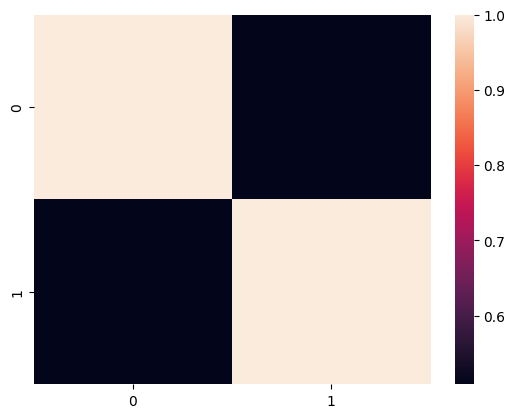

In [28]:
import seaborn as sns


sns.heatmap(embs.dot(embs.T))

In [26]:
embs.dot(embs.T)

array([[1.0000001, 0.5085638],
       [0.5085638, 1.0000002]], dtype=float32)

<Axes: >

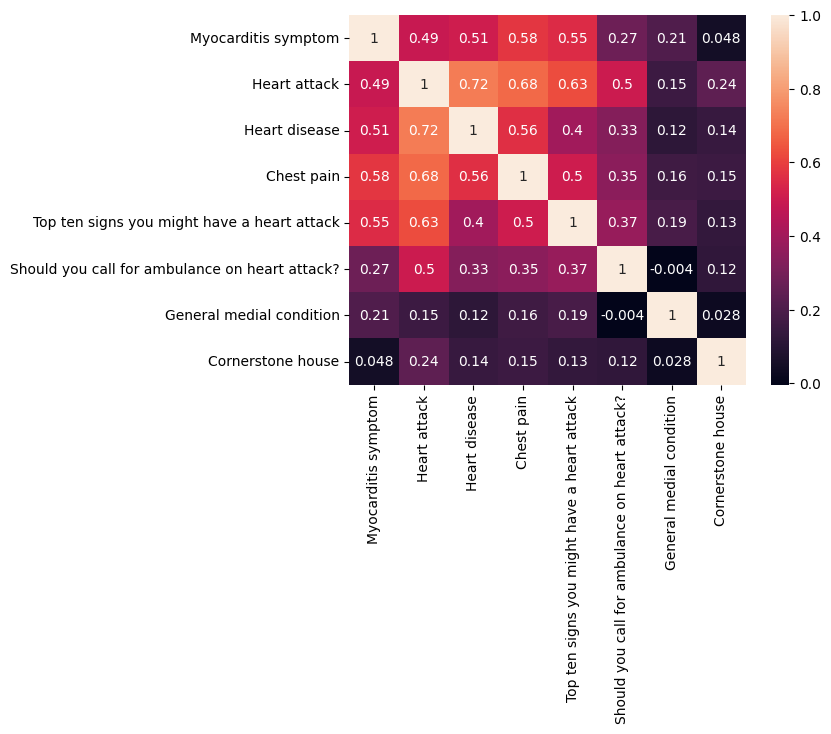

In [47]:

sentences = [
    "Myocarditis symptom",
    "Heart attack",
    "Heart disease",
    "Chest pain",
    "Top ten signs you might have a heart attack",
    "Should you call for ambulance on heart attack?",
    "General medial condition",
    "Cornerstone house"
]

embs = embedder.embed_batch(sentences)

sns.heatmap(embs.dot(embs.T), annot=True, yticklabels=sentences, xticklabels=sentences)